In [1]:
import sys
from pathlib import Path

EC = str(Path("~diane/proj/encoded_client").expanduser())
if EC not in sys.path:
    sys.path.append(EC)

WRS = str(Path("~diane/proj/woldlab-rna-seq/").expanduser())
if WRS not in sys.path:
    sys.path.append(WRS)
    

In [2]:
import pandas
from encoded_client.encoded import ENCODED
from tqdm import tqdm

from woldrnaseq.madqc import load_rsem_quantifications

In [3]:
server = ENCODED("www.encodeproject.org")

In [4]:
#query_all = "https://www.encodeproject.org/search/?type=Experiment&status=released&assay_title=total+RNA-seq&lab.title=Barbara+Wold%2C+Caltech"
query_mouse = "https://www.encodeproject.org/search/?type=Experiment&control_type!=*&status=released&perturbed=false&assay_title=total+RNA-seq&lab.title=Barbara+Wold%2C+Caltech&award.rfa=ENCODE4&replicates.library.biosample.donor.organism.scientific_name=Mus+musculus"

graph = server.get_json(query_mouse)["@graph"]
    

In [5]:
def get_rsem_url(experiment_id):
    e = server.get_json(experiment_id)
    default_analysis = e["default_analysis"]
    for f in e['files']:
        analyses = [x["@id"] for x in f.get("analyses", [])]
        if f.get('output_type', None) == 'gene quantifications' and default_analysis in analyses:
            url = 'https://www.encodeproject.org' + f['href']
            return url

get_rsem_url(graph[0]["@id"])

'https://www.encodeproject.org/files/ENCFF231OXS/@@download/ENCFF231OXS.tsv'

In [6]:
rsem_urls = []
for row in tqdm(graph):
    url = get_rsem_url(row["@id"])
    if url is not None:
        rsem_urls.append(url)

100%|██████████| 79/79 [00:13<00:00,  5.81it/s]


In [7]:
tpms = load_rsem_quantifications(rsem_urls, column="TPM")

In [18]:
spike_sum = tpms.iloc[-97:].sum()

In [19]:
total = tpms.sum()

In [20]:
fraction_spikes = (spike_sum / total)

<AxesSubplot:>

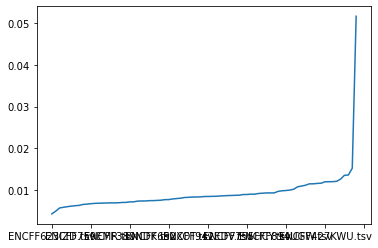

In [21]:
fraction_spikes.sort_values().plot()